# Simple rate of return

Download the data for Microsoft (‘MSFT’) from Yahoo Finance for the period ‘2000-1-1’ until today.

In [44]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
PG = wb.DataReader('MSFT', data_source='yahoo', start='2000-1-1')

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,59.3125,56.00000,58.68750,58.28125,53228400.0,37.289700
2000-01-04,58.5625,56.12500,56.78125,56.31250,54119000.0,36.030037
2000-01-05,58.1875,54.68750,55.56250,56.90625,64059600.0,36.409924
2000-01-06,56.9375,54.18750,56.09375,55.00000,54976600.0,35.190277
2000-01-07,56.1250,53.65625,54.31250,55.71875,62013600.0,35.650139


In [4]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-18,196.490005,194.000000,194.000000,196.320007,23061600.0,196.320007
2020-06-19,199.289993,194.369995,198.589996,195.149994,44441100.0,195.149994
2020-06-22,200.759995,195.229996,195.789993,200.570007,32818900.0,200.570007
2020-06-23,203.949997,201.429993,202.089996,201.910004,30871100.0,201.910004
2020-06-24,203.229996,196.580002,201.604004,197.839996,35477642.0,197.839996


### Simple Rate of Return

Calculate the simple returns of ‘MSFT’ for the given timeframe.

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
PG['simple_return_rate'] = ((PG['Adj Close']/PG['Adj Close'].shift(1)) - 1)

In [6]:
print(PG['simple_return_rate'])

Date
2000-01-03         NaN
2000-01-04   -0.033780
2000-01-05    0.010544
2000-01-06   -0.033498
2000-01-07    0.013068
                ...   
2020-06-18    0.010708
2020-06-19   -0.005960
2020-06-22    0.027774
2020-06-23    0.006681
2020-06-24   -0.020158
Name: simple_return_rate, Length: 5152, dtype: float64


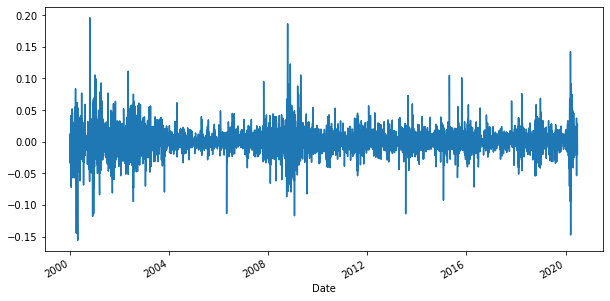

In [7]:
PG['simple_return_rate'].plot(figsize=(10,5))

In [8]:
# Avg daily rate of return on the period (2000-2020)
avg_return_d = PG['simple_return_rate'].mean()
avg_return_d

0.0005139985957087773

In [9]:
# assuming 250 trading days per year
avg_return_a = PG['simple_return_rate'].mean()*250
avg_return_a

0.12849964892719434

In [10]:
print(str(avg_return_a*100) + '%')

12.849964892719434%


# Log rate of return

In [11]:
# Show first values of the dataframe
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return_rate
Date,,,,,,,
2000-01-03,59.3125,56.00000,58.68750,58.28125,53228400.0,37.289700,NaN
2000-01-04,58.5625,56.12500,56.78125,56.31250,54119000.0,36.030037,-0.033780
2000-01-05,58.1875,54.68750,55.56250,56.90625,64059600.0,36.409924,0.010544
2000-01-06,56.9375,54.18750,56.09375,55.00000,54976600.0,35.190277,-0.033498
2000-01-07,56.1250,53.65625,54.31250,55.71875,62013600.0,35.650139,0.013068


In [12]:
# Show last values of the dataframe
PG.tail()

,High,Low,Open,Close,Volume,Adj Close,simple_return_rate
Date,,,,,,,
2020-06-18,196.490005,194.000000,194.000000,196.320007,23061600.0,196.320007,0.010708
2020-06-19,199.289993,194.369995,198.589996,195.149994,44441100.0,195.149994,-0.005960
2020-06-22,200.759995,195.229996,195.789993,200.570007,32818900.0,200.570007,0.027774
2020-06-23,203.949997,201.429993,202.089996,201.910004,30871100.0,201.910004,0.006681
2020-06-24,203.229996,196.580002,201.604004,197.839996,35477642.0,197.839996,-0.020158


In [13]:
PG['log_return_rate'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
PG

,High,Low,Open,Close,Volume,Adj Close,simple_return_rate,log_return_rate
Date,,,,,,,,
2000-01-03,59.312500,56.000000,58.687500,58.281250,53228400.0,37.289700,NaN,NaN
2000-01-04,58.562500,56.125000,56.781250,56.312500,54119000.0,36.030037,-0.033780,-0.034364
2000-01-05,58.187500,54.687500,55.562500,56.906250,64059600.0,36.409924,0.010544,0.010488
2000-01-06,56.937500,54.187500,56.093750,55.000000,54976600.0,35.190277,-0.033498,-0.034072
2000-01-07,56.125000,53.656250,54.312500,55.718750,62013600.0,35.650139,0.013068,0.012983
...,...,...,...,...,...,...,...,...
2020-06-18,196.490005,194.000000,194.000000,196.320007,23061600.0,196.320007,0.010708,0.010651
2020-06-19,199.289993,194.369995,198.589996,195.149994,44441100.0,195.149994,-0.005960,-0.005978
2020-06-22,200.759995,195.229996,195.789993,200.570007,32818900.0,200.570007,0.027774,0.027395


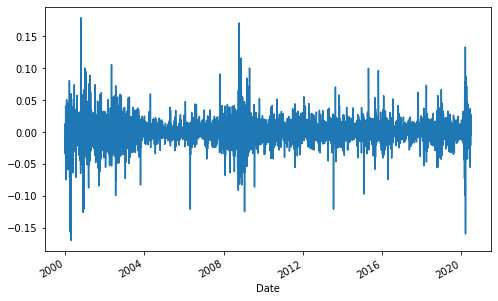

In [14]:
# PLOT
PG['log_return_rate'].plot(figsize=(8,5))

In [15]:
log_return_d = PG['log_return_rate'].mean()
log_return_d

0.00032396456368571886

In [16]:
log_return_a = PG['log_return_rate'].mean() * 250
log_return_a

0.08099114092142971

In [17]:
print(str(log_return_a*100) + '%')


8.09911409214297%


# Portfolio rate of return

In [18]:
positions = ['PG', 'MSFT', 'F', 'GE']
portfolio_source_data = pd.DataFrame()
for p in positions:
    portfolio_source_data[p] = wb.DataReader(p, data_source='yahoo', start='1995-1-1')['Adj Close']

In [19]:
portfolio_source_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6415 entries, 1995-01-03 to 2020-06-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6415 non-null   float64
 1   MSFT    6415 non-null   float64
 2   F       6415 non-null   float64
 3   GE      6415 non-null   float64
dtypes: float64(4)
memory usage: 250.6 KB


In [20]:
portfolio_source_data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.313478,2.406834,4.242091,4.074910
1995-01-04,8.246841,2.424330,4.356228,4.074910
1995-01-05,8.130219,2.384342,4.318182,4.084897
1995-01-06,8.146880,2.424330,4.318182,4.064922
1995-01-09,8.113561,2.409335,4.394274,4.024974


In [21]:
portfolio_source_data.tail()

,PG,MSFT,F,GE
Date,,,,
2020-06-18,119.279999,196.320007,6.33,7.28
2020-06-19,118.919998,195.149994,6.23,7.15
2020-06-22,117.750000,200.570007,6.28,7.04
2020-06-23,117.730003,201.910004,6.15,7.00
2020-06-24,116.419998,197.839996,5.95,6.53


In [22]:
#for p in positions:
#    portfolio_source_data[str(p)+'simple_return_rate'] = ((portfolio_source_data[p]/portfolio_source_data[p].shift(1)) - 1)

In [23]:
portfolio_source_data

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.313478,2.406834,4.242091,4.074910
1995-01-04,8.246841,2.424330,4.356228,4.074910
1995-01-05,8.130219,2.384342,4.318182,4.084897
1995-01-06,8.146880,2.424330,4.318182,4.064922
1995-01-09,8.113561,2.409335,4.394274,4.024974
...,...,...,...,...
2020-06-18,119.279999,196.320007,6.330000,7.280000
2020-06-19,118.919998,195.149994,6.230000,7.150000
2020-06-22,117.750000,200.570007,6.280000,7.040000


In [24]:
# loc -> give the certain entry you want to retrieve
# iloc -> specify the position you want to retrieve (by index)
portfolio_source_data.iloc[0]

PG      8.313478
MSFT    2.406834
F       4.242091
GE      4.074910
Name: 1995-01-03 00:00:00, dtype: float64

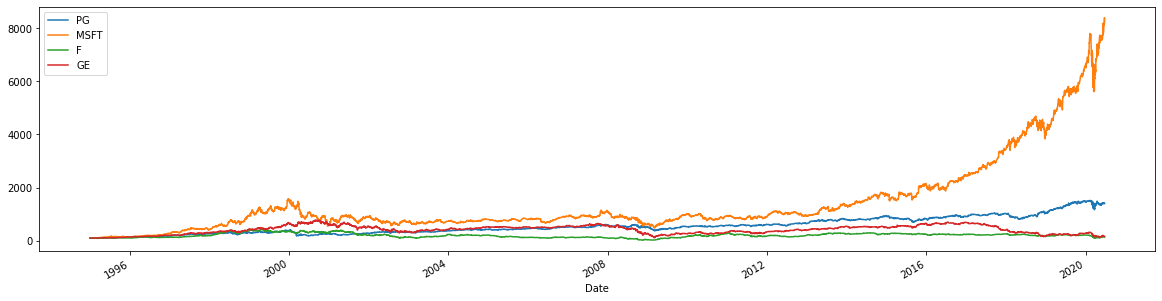

In [25]:
# Graph the stocks normalized data
(portfolio_source_data / portfolio_source_data.iloc[0] * 100).plot(figsize=(20,5))
plt.show()

# Calculate return of securities portfolio

In [26]:
sample_port_returns = (portfolio_source_data/portfolio_source_data.shift(1)) - 1

In [27]:
sample_port_returns

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009827
...,...,...,...,...
2020-06-18,0.011447,0.010708,0.000000,0.005525
2020-06-19,-0.003018,-0.005960,-0.015798,-0.017857
2020-06-22,-0.009839,0.027774,0.008026,-0.015385


In [28]:
portfolio_stocks_percentages = np.array([0.30, 0.20, 0.15, 0.35])

In [29]:
annual_returns = sample_port_returns.mean()*250
annual_returns

PG      0.128793
MSFT    0.221956
F       0.093137
GE      0.068757
dtype: float64

In [30]:
portfolio_return = np.dot(annual_returns, portfolio_stocks_percentages)
portfolio_return

0.12106423831876581

# Indices rate of return


In [31]:
indices = ['^GSPC', '^IXIC', '^GDAXI']
indices_data = pd.DataFrame()
for i in indices:
    indices_data[i] = wb.DataReader(i, data_source='yahoo', start='1997-1-1')['Adj Close']

In [32]:
indices_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010
1997-01-06,747.650024,1316.400024,2890.199951
1997-01-07,753.229980,1327.729980,2876.340088
1997-01-08,748.409973,1320.349976,2904.080078


In [33]:
indices_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-06-18,3115.340088,9943.049805,12281.530273
2020-06-19,3097.739990,9946.120117,12330.759766
2020-06-22,3117.860107,10056.480469,12262.969727
2020-06-23,3131.290039,10131.370117,12523.759766
2020-06-24,3050.330078,9909.166016,12093.940430


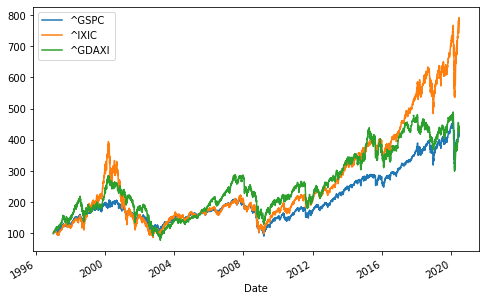

In [34]:
(indices_data / indices_data.iloc[0] * 100).plot(figsize=(8,5))

In [35]:
indices_returns = (indices_data / indices_data.shift(1)) - 1

In [36]:
indices_returns.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,NaN,NaN,NaN
1997-01-03,0.014952,0.023409,0.015049
1997-01-06,-0.000508,0.004364,0.009409
1997-01-07,0.007463,0.008607,-0.004795
1997-01-08,-0.006399,-0.005558,0.009644


In [37]:
indices_returns.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-06-18,0.000594,0.003281,-0.008125
2020-06-19,-0.005649,0.000309,0.004008
2020-06-22,0.006495,0.011096,-0.005498
2020-06-23,0.004307,0.007447,0.021266
2020-06-24,-0.025855,-0.021932,-0.034320


In [38]:
avg_indices_returns = indices_returns.mean()
avg_indices_returns

^GSPC     0.000319
^IXIC     0.000474
^GDAXI    0.000300
dtype: float64

In [39]:
yearly_indices_returns = indices_returns.mean() * 250
yearly_indices_returns

^GSPC     0.079643
^IXIC     0.118493
^GDAXI    0.074952
dtype: float64

## Comparing indeces performance vs stocks


In [40]:
sources = ['PG', '^IXIC', '^GDAXI']
mixed_data = pd.DataFrame()
for s in sources:
    mixed_data[s] = wb.DataReader(s, data_source='yahoo', start='1997-1-1')['Adj Close']

In [41]:
mixed_data.head()

,PG,^IXIC,^GDAXI
Date,,,
1997-01-02,14.802818,1280.699951,2820.810059
1997-01-03,15.045772,1310.680054,2863.260010
1997-01-06,15.149903,1316.400024,2890.199951
1997-01-07,15.427564,1327.729980,2876.340088
1997-01-08,15.149903,1320.349976,2904.080078


In [42]:
mixed_data.tail()

,PG,^IXIC,^GDAXI
Date,,,
2020-06-18,119.279999,9943.049805,12281.530273
2020-06-19,118.919998,9946.120117,12330.759766
2020-06-22,117.750000,10056.480469,12262.969727
2020-06-23,117.730003,10131.370117,12523.759766
2020-06-24,116.419998,9909.166016,12093.940430


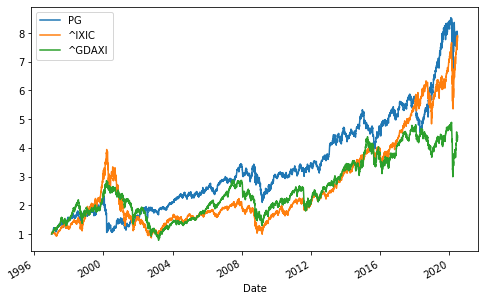

In [43]:
# Plot the normalized value through time
(mixed_data / mixed_data.iloc[0]).plot(figsize=(8,5))
plt.show()
# PG usually performs better than the indeces.